# CONVOLUTIONAL NEURAL NETWORK NB (CNN-First on DL)  

## libraries and env configuration 


In [1]:
import tensorflow as Tf
import os as os 
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import ssl

In [2]:
physicalDevice = Tf.config.experimental.list_physical_devices('GPU')
Tf.config.experimental.set_memory_growth(physicalDevice[0], True)
print("Num GPUs Available: ", len(physicalDevice))


Num GPUs Available:  1


In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2' # Suppress TensorFlow logging (1)	

## data preprocessing 

In [4]:
# Load MNIST dataset
(xTrainMnist,yTrainMnist),(xTestMnist,yTestMnist)=Tf.keras.datasets.mnist.load_data()

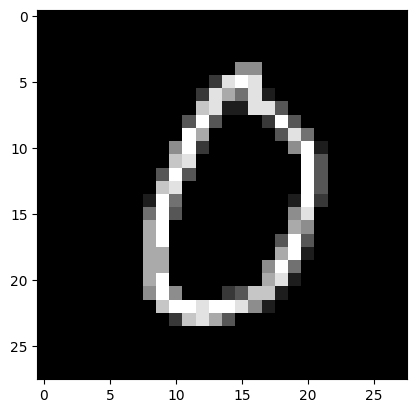

In [5]:
# charging a random image from the training set and displaying it using matplotlib
idx = np.random.choice(xTrainMnist.shape[0], 1000, replace=False) 
plt.imshow(xTrainMnist[idx[0]], cmap='gray') 
plt.show()

### normalization 

In [6]:
xTrainMnist.max()

255

In [7]:
# Normalizing the data to be between 0 and 1
xTrainMnist = xTrainMnist.astype('float32') / 255
xTestMnist = xTestMnist.astype('float32') / 255 

"""
could also use: 

xTrainMnist = xTrainMnist / xTrainMnist.max()
xTestMnist = xTestMnist / xTestMnist.max()


"""

'\ncould also use: \n\nxTrainMnist = xTrainMnist / xTrainMnist.max()\nxTestMnist = xTestMnist / xTestMnist.max()\n\n\n'

### look dimension size

In [8]:
xTrainMnist.shape, yTrainMnist.shape, xTestMnist.shape, yTestMnist.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
print(yTrainMnist[0:10]) # display the first 10 labels of the training set
print(yTestMnist[0:10]) # display the first 10 labels of the test set

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


## creating a sequential model 

In [10]:
BasicMnistModel = Tf.keras.models.Sequential() 
# Add a Flatten layer to convert the 2D images to 1D vectors  ( transforming my 28 x 28 tensor to a 1D array ) 
BasicMnistModel.add(Tf.keras.layers.Flatten(input_shape=(28, 28))) 
BasicMnistModel.summary() # display the summary of the model 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [11]:
BasicMnistModel.add(Tf.keras.layers.Dense(256, activation ='relu')) # add a fully connected layer with 256 neurons and ReLU activation function     
BasicMnistModel.add(Tf.keras.layers.Dense(128, activation ='relu')) # add a fully connected layer with 128 neurons and ReLU activation function 
BasicMnistModel.add(Tf.keras.layers.Dense(10, activation ='softmax')) # add a fully connected layer with 10 neurons and softmax activation function ( output layer )    


In [12]:
# proceed compiling the model 
BasicMnistModel.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy']) # use Adam optimizer and sparse categorical crossentropy loss function



### proceding training the model 

In [13]:
# fit the model to the training data
MnistHistory = BasicMnistModel.fit(xTrainMnist, yTrainMnist, epochs = 5 , batch_size = 32, validation_split = 0.3, validation_data=(xTestMnist, yTestMnist), verbose = 1) # fit the model to the training data with 5 epochs and a batch size of 32, using 30% of the training data for validation and displaying the progress bar


Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2022 - accuracy: 0.9385 - val_loss: 0.0985 - val_accuracy: 0.9701
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0842 - accuracy: 0.9737 - val_loss: 0.1033 - val_accuracy: 0.9681
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.0822 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.0712 - val_accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0745 - val_accuracy: 0.9786


### lets see accuracy of the Mnist model : 


In [ ]:
loss, acc = BasicMnistModel.evaluate(xTestMnist, yTestMnist) # evaluate the model on the test set


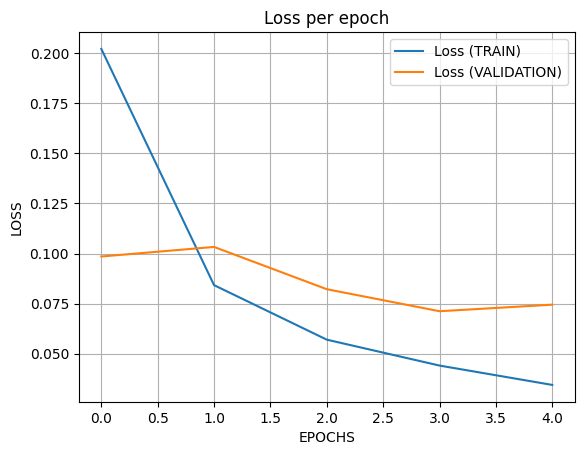

 error w/h noisy at the entry of the model : 7.45%


In [33]:
plt.plot(MnistHistory.history['loss'], label='Loss (TRAIN)')
plt.plot(MnistHistory.history['val_loss'], label='Loss (VALIDATION)')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title('Loss per epoch')
plt.legend()
plt.grid()
plt.show()
print(f" error w/h noisy at the entry of the model : {loss*100:.2f}%")



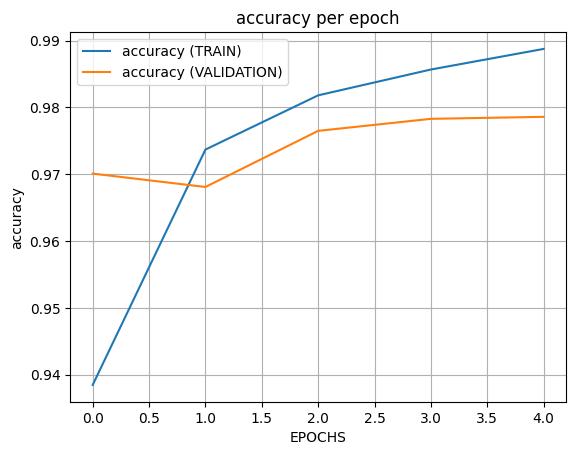

accuracy with noisy at the entry of the model : 97.86%


In [34]:
plt.plot(MnistHistory.history['accuracy'], label='accuracy (TRAIN)')
plt.plot(MnistHistory.history['val_accuracy'], label='accuracy (VALIDATION)')
plt.xlabel('EPOCHS')
plt.ylabel('accuracy')
plt.title('accuracy per epoch')
plt.legend()
plt.grid()
plt.show()

print(f"accuracy with noisy at the entry of the model : {acc*100:.2f}%")


## proceed with a class prediciton for our random sample

use a random variable to our data sample 

In [35]:
id = np.random.choice(xTestMnist.shape[0], 1000, replace=False) 


In [36]:
MnistPredictions = BasicMnistModel.predict(xTestMnist[id[0]:id[0]+1]) # make predictions on the test set

1/1 [==============================] - 0s 300ms/step


predicted class: [7]
rial class:  7


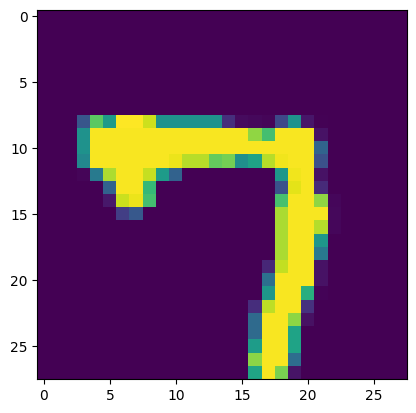

In [37]:
predicted_class = np.argmax(MnistPredictions, axis=1)
plt.imshow(xTestMnist[id[0]])

print("predicted class:" , predicted_class)
print("rial class: ",yTestMnist[id[0]]) # display the true class of the image